# Libraries

In [1]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 30.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
from google.colab import userdata

In [ ]:
WLSACCESSID = userdata.get('gurobi_WLSACCESSID')
WLSSECRET = userdata.get('gurobi_WLSSECRET')
LICENSEID = int(userdata.get('gurobi_LICENSEID'))

params = {
"WLSACCESSID": WLSACCESSID,
"WLSSECRET": WLSSECRET,
"LICENSEID": LICENSEID,
}
env = gp.Env(params=params) #this line initializes the gurobi environment

# Data

In [4]:
url = 'https://raw.githubusercontent.com/ceche1212/math_love_RQMKP_medium/main/input_data.csv'

In [5]:
df = pd.read_csv(url,index_col=0)

In [6]:
df

,Voltorb,Koffing,Trevenant,Pikachu,Machoke,Drapion,Pansear,Meditite,Tyrantrum,Snubbull,...,Shelmet,Reshiram,AbomasnowMega Abomasnow,Liepard,Pelipper,Audino,Aipom,Sceptile,KyuremWhite Kyurem,Dugtrio
Voltorb,0,1,1,1,0,-1,1,0,1,0,...,0,0,0,-1,0,1,0,-1,0,0
Koffing,-1,0,1,-1,0,1,0,0,1,0,...,1,1,0,-1,0,0,1,0,1,0
Trevenant,-1,1,0,-1,1,1,0,-1,0,1,...,1,1,1,0,-1,-1,1,-1,-1,-1
Pikachu,0,0,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,1,-1,0
Machoke,-1,1,1,-1,0,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,1,1,-1
Drapion,-1,1,1,-1,-1,0,1,-1,1,1,...,1,-1,1,0,-1,-1,1,0,1,-1
Pansear,0,1,0,0,1,0,0,0,1,0,...,1,1,1,-1,-1,1,1,0,1,0
Meditite,0,1,0,1,1,-1,0,0,0,1,...,0,1,1,-1,-1,-1,0,1,1,-1
Tyrantrum,-1,1,-1,-1,1,-1,-1,-1,0,1,...,1,0,0,-1,-1,1,0,0,-1,-1
Snubbull,-1,0,1,1,1,0,-1,-1,1,0,...,1,0,1,0,1,1,1,1,-1,0


In [7]:
idx_to_col = {i:v for i,v in enumerate(df.columns)}
col_to_idx = {v:i for i,v in enumerate(df.columns)}

In [8]:
col_to_idx

{'Voltorb': 0,
 'Koffing': 1,
 'Trevenant': 2,
 'Pikachu': 3,
 'Machoke': 4,
 'Drapion': 5,
 'Pansear': 6,
 'Meditite': 7,
 'Tyrantrum': 8,
 'Snubbull': 9,
 'Wobbuffet': 10,
 'Shelmet': 11,
 'Reshiram': 12,
 'AbomasnowMega Abomasnow': 13,
 'Liepard': 14,
 'Pelipper': 15,
 'Audino': 16,
 'Aipom': 17,
 'Sceptile': 18,
 'KyuremWhite Kyurem': 19,
 'Dugtrio': 20}

In [9]:
idx_to_col

{0: 'Voltorb',
 1: 'Koffing',
 2: 'Trevenant',
 3: 'Pikachu',
 4: 'Machoke',
 5: 'Drapion',
 6: 'Pansear',
 7: 'Meditite',
 8: 'Tyrantrum',
 9: 'Snubbull',
 10: 'Wobbuffet',
 11: 'Shelmet',
 12: 'Reshiram',
 13: 'AbomasnowMega Abomasnow',
 14: 'Liepard',
 15: 'Pelipper',
 16: 'Audino',
 17: 'Aipom',
 18: 'Sceptile',
 19: 'KyuremWhite Kyurem',
 20: 'Dugtrio'}

In [10]:
data = df.to_numpy() # trnasform the data into a numpy array

# Making a network plot

In [11]:
G = nx.DiGraph()

nodes = df.columns.to_list()
G.add_nodes_from(nodes)

for i,n1 in enumerate(nodes):
  for j,n2 in enumerate(nodes):
    if i == j:
      continue
    else:
      c_i_j = data[i,j]

      if  c_i_j > 0:
        G.add_edge(n1,n2,weight=c_i_j,color = 'b')
      else:
        G.add_edge(n1,n2,weight=c_i_j,color = 'r')

In [12]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

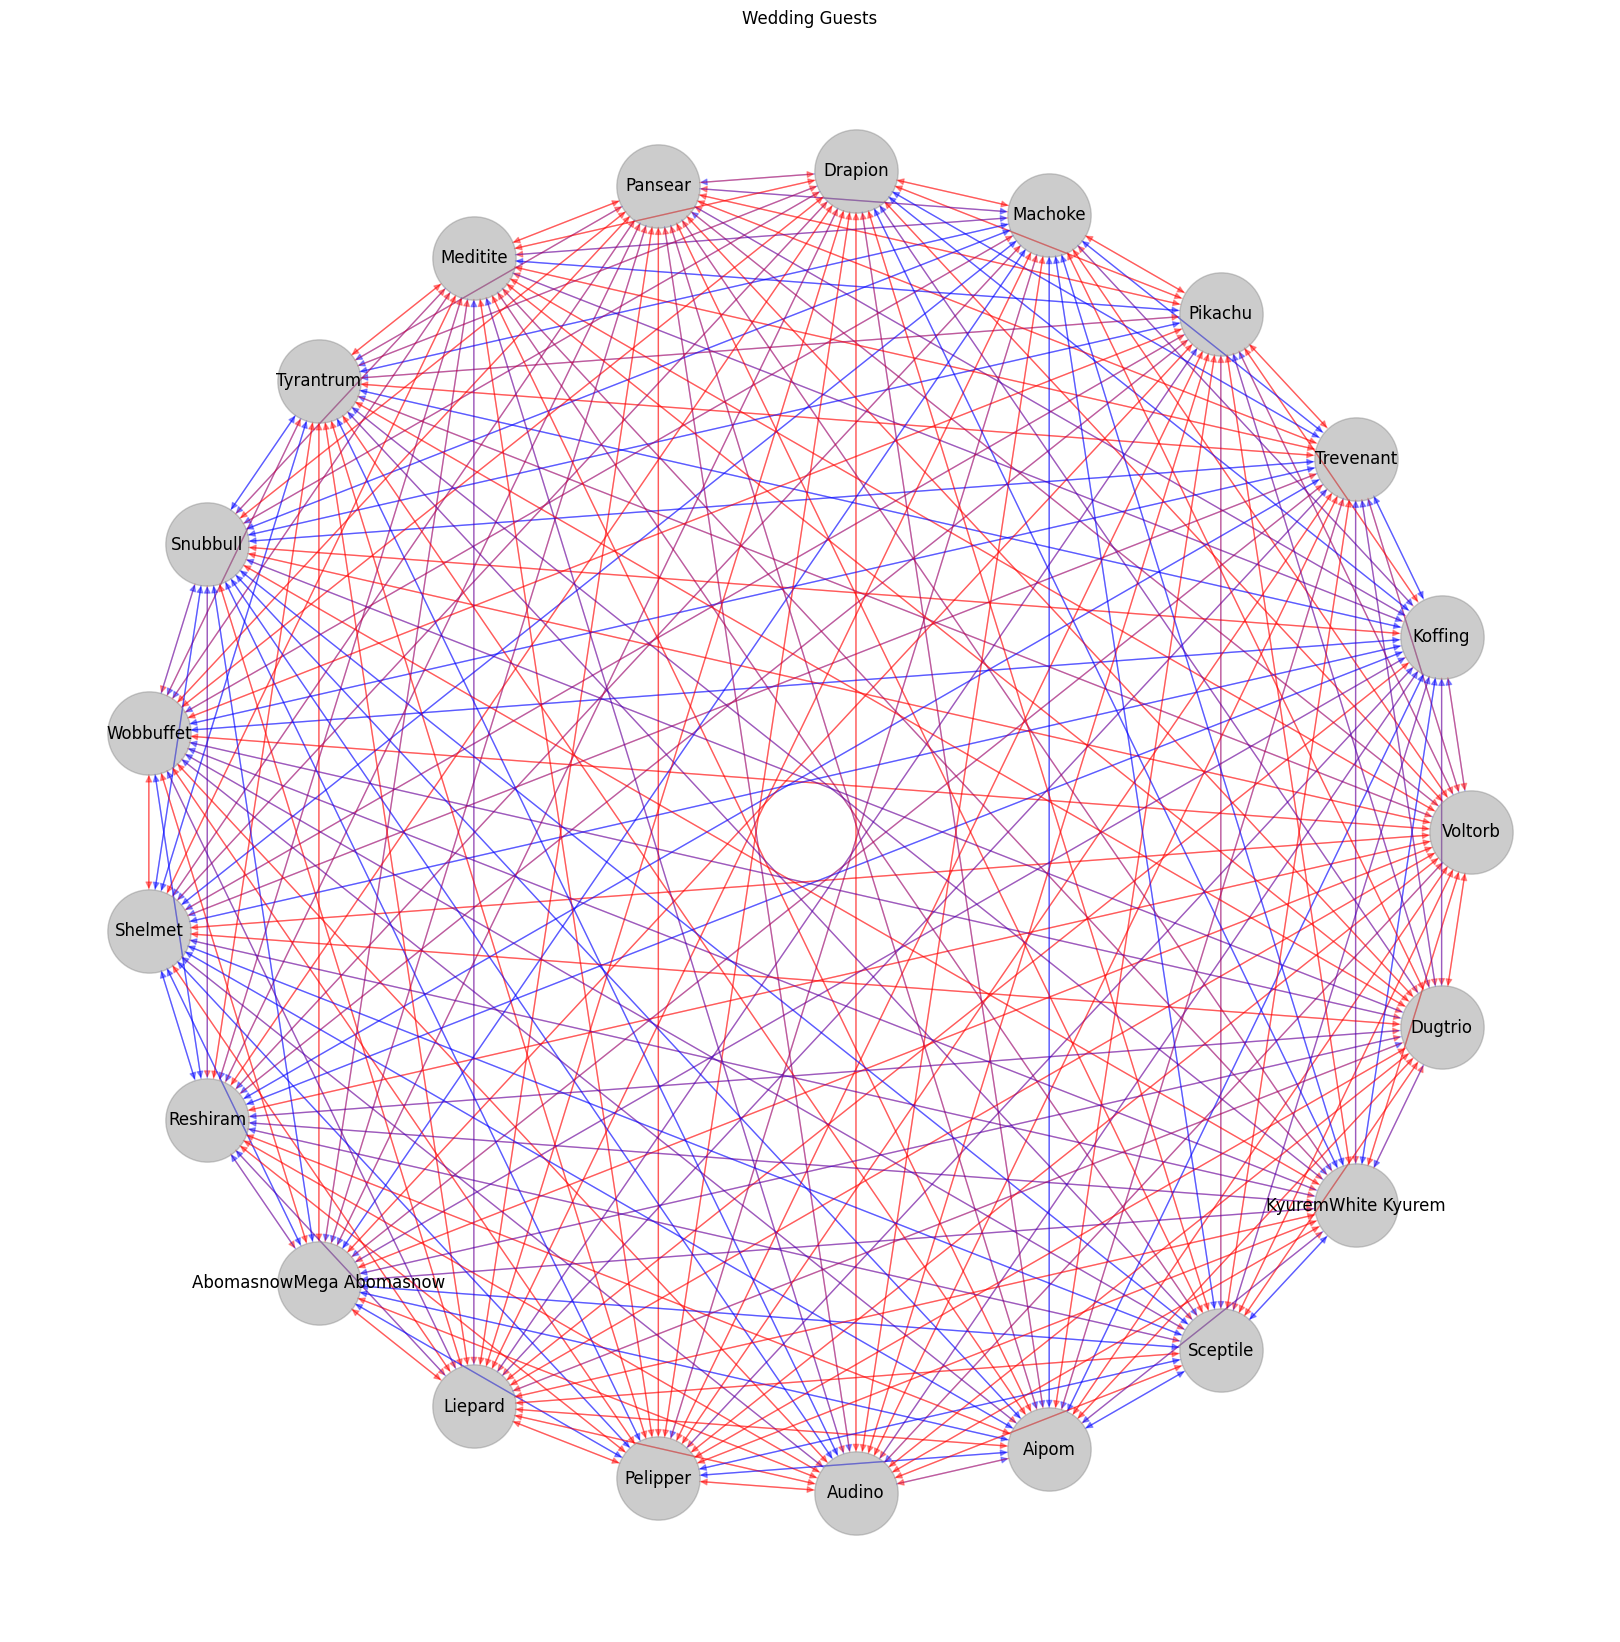

In [13]:
plt.figure(figsize=(16,16))
pos = nx.circular_layout(G)
pos_nodes = nudge(pos, 1, 1)
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, pos_nodes, edge_color=colors,node_color='grey', alpha=0.4, node_size=3600)
nx.draw_networkx_labels(G, pos=pos_nodes)
plt.title('Wedding Guests')
plt.show()

In [14]:
col_to_idx

{'Voltorb': 0,
 'Koffing': 1,
 'Trevenant': 2,
 'Pikachu': 3,
 'Machoke': 4,
 'Drapion': 5,
 'Pansear': 6,
 'Meditite': 7,
 'Tyrantrum': 8,
 'Snubbull': 9,
 'Wobbuffet': 10,
 'Shelmet': 11,
 'Reshiram': 12,
 'AbomasnowMega Abomasnow': 13,
 'Liepard': 14,
 'Pelipper': 15,
 'Audino': 16,
 'Aipom': 17,
 'Sceptile': 18,
 'KyuremWhite Kyurem': 19,
 'Dugtrio': 20}

In [16]:
n_tables = 3
B_k = [7,7,7]
E = [(col_to_idx['Pikachu'],col_to_idx['Meditite']),
           (col_to_idx['Machoke'],col_to_idx['Tyrantrum']),
           (col_to_idx['Aipom'],col_to_idx['Pelipper'])]

I,K = range(len(col_to_idx)),range(n_tables)

# Model Max-Sum-RQMKP

\begin{align}
& \text{Maximize} \quad \sum_{i=1}^{n}\sum_{i\neq j}^{n}\sum_{k=1}^{m} x_{i,k}x_{j,k}c_{i,j} \nonumber  \\
& \text{s.t:}  \nonumber\\
& \sum_{k=1}^{m}x_{i,k} = 1 \quad \quad \forall i \in \mathcal{I} \\
& \sum_{i=1}^{n}x_{i,k} \leq B_k \quad \quad \forall k \in \mathcal{C} \\
& x_{i,k} = x_{j,k} \quad \quad \forall (i,j) \in \mathcal{E} \quad \text{and} \quad \forall k \in \mathcal{C} \\
& x_{i,k} \in \{0,1\}
\end{align}

In [17]:
x_vars = [(i,k) for i in I for k in K]

model = gp.Model('Max_Sum_RQMKP',env=env) #initialize model

X = model.addVars(x_vars,vtype=GRB.BINARY, name="X") # create variables

model.setObjective( gp.quicksum( data[(i,j)]*X[i,k]*X[j,k] for i in I \
                                for j in I \
                                for k in K), GRB.MAXIMIZE )

# Constraint (1)
model.addConstrs( gp.quicksum( X[i,k] for k in K ) == 1 for i in I)

# Constraint (2)
model.addConstrs( gp.quicksum( X[i,k] for i in I ) <= B_k[k]  for k in K)

# Constraint (3)
for i,j in E:
  for k in K:
    model.addConstr(X[i,k] == X[j,k])


In [18]:
tl = 600
mip_gap = 0.00

model.setParam('TimeLimit', tl)
model.setParam('MIPGap', mip_gap)
model.optimize()

Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 939556 - for non-commercial use only - registered to lu___@ieseg.fr
Optimize a model with 33 rows, 63 columns and 144 nonzeros
Model fingerprint: 0xe0381091
Model has 489 quadratic objective terms
Variable types: 0 continuous, 63 integer (63 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]
Found heuristic solution: objective 31.0000000
Presolve removed 12 rows and 9 columns
Presolve time: 0.02s
Presolved: 393 rows, 426 columns, 1224 nonzeros
Variable types: 0 continuous, 426 integer (426 binary)

Root relaxation: objecti

## Extract the solution

In [19]:
max_sum_tables = [ []  for k in K]
for x in X.keys():
  if X[x].x > 0.95:
    guest_idx = x[0]
    table = x[1]
    guest_name = idx_to_col[guest_idx]
    max_sum_tables[table].append(guest_idx)
    print(f"{guest_name} in table {table + 1}")

Voltorb in table 1
Koffing in table 2
Trevenant in table 2
Pikachu in table 1
Machoke in table 3
Drapion in table 2
Pansear in table 1
Meditite in table 1
Tyrantrum in table 3
Snubbull in table 1
Wobbuffet in table 2
Shelmet in table 3
Reshiram in table 2
AbomasnowMega Abomasnow in table 3
Liepard in table 1
Pelipper in table 3
Audino in table 1
Aipom in table 3
Sceptile in table 3
KyuremWhite Kyurem in table 2
Dugtrio in table 2


In [22]:
for i,table in enumerate(max_sum_tables):

  Z = 0
  table_comp = [idx_to_col[x] for x in table]
  for n1 in table:
    for n2 in table:
      Z += data[n1,n2]
  print(f" Table {i+1} ({table_comp}), Hapiness  = {Z}")

 Table 1 (['Voltorb', 'Pikachu', 'Pansear', 'Meditite', 'Snubbull', 'Liepard', 'Audino']), Hapiness  = 3
 Table 2 (['Koffing', 'Trevenant', 'Drapion', 'Wobbuffet', 'Reshiram', 'KyuremWhite Kyurem', 'Dugtrio']), Hapiness  = 23
 Table 3 (['Machoke', 'Tyrantrum', 'Shelmet', 'AbomasnowMega Abomasnow', 'Pelipper', 'Aipom', 'Sceptile']), Hapiness  = 33


In [109]:
Tables_G = nx.Graph()

for i,table in enumerate(max_sum_tables):
  table_comp = [idx_to_col[x] for x in table]
  table_name = f'Table {i+1}'
  Tables_G.add_node(table_name,type='table')

  for guest in table_comp:
    Tables_G.add_node(guest,type = 'guest')
    e = (table_name,guest)
    Tables_G.add_edge(*e)

In [110]:
# Find table nodes and guest nodes
table_nodes = [node for node, data in Tables_G.nodes(data=True) if data['type'] == 'table']
guest_nodes = [node for node, data in Tables_G.nodes(data=True) if data['type'] == 'guest']

In [111]:
pos = nx.circular_layout(Tables_G)

# For each table node, create a circular layout for its guests
for table in table_nodes:
    # Get the neighbors (guests) of the table
    guests = list(Tables_G.neighbors(table))

    # Calculate circular layout for guests around the table node
    num_guests = len(guests)
    angle_step = 2 * np.pi / num_guests
    radius = 0.5  # Adjust the radius to space guests further from the table

    for i, guest in enumerate(guests):
        angle = i * angle_step
        pos[guest] = pos[table] + np.array([radius * np.cos(angle), radius * np.sin(angle)])

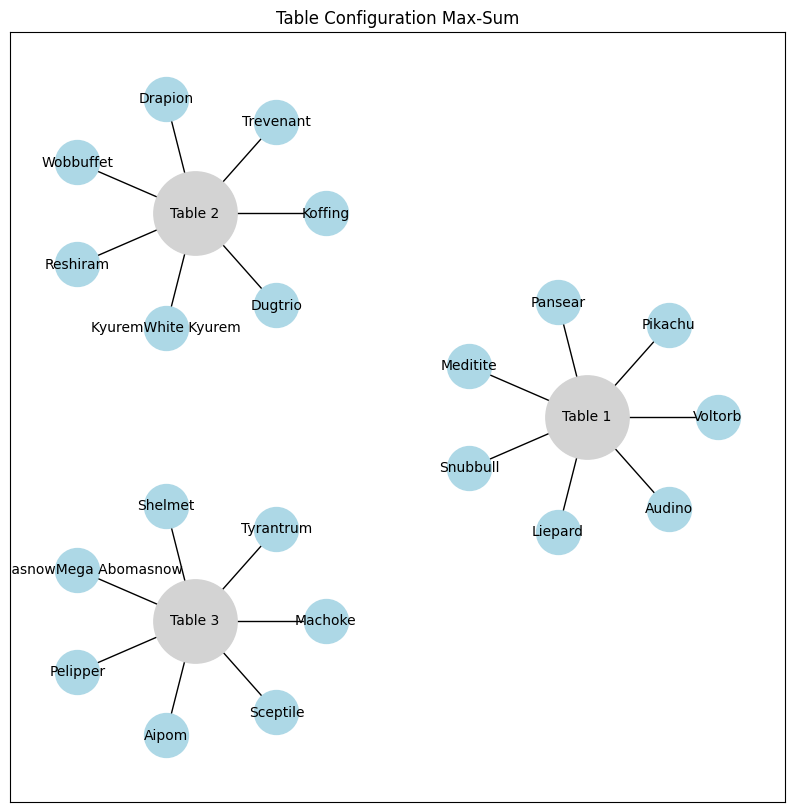

In [119]:
# Draw the graph with differentiated node sizes
plt.figure(figsize=(10, 10))

# Draw the table nodes
nx.draw_networkx_nodes(Tables_G, pos, nodelist=table_nodes, node_color='lightgrey', node_size=3600, label='Table',)

# Draw the guest nodes
nx.draw_networkx_nodes(Tables_G, pos, nodelist=guest_nodes, node_color='lightblue', node_size=1000, label='Guest')

# Draw the edges and labels
nx.draw_networkx_edges(Tables_G, pos)
nx.draw_networkx_labels(Tables_G, pos, font_size=10)
plt.title('Table Configuration Max-Sum')
plt.show()

# Model Max-Min-RQMKP

\begin{align}
& \text{Maximize}\quad \zeta \nonumber  \\
& \text{s.t:}  \nonumber\\
& \zeta \leq \sum_{i=1}^{n}\sum_{i\neq j}^{n}x_{i,k}x_{j,k}c_{i,j} \quad \quad \forall k \in \mathcal{C} \\
& \sum_{k=1}^{m}x_{i,k} = 1 \quad \quad \forall i \in \mathcal{I} \\
& \sum_{i=1}^{n}x_{i,k} \leq B_k \quad \quad \forall k \in \mathcal{C} \\
& x_{i,k} = x_{j,k} \quad \quad \forall (i,j) \in \mathcal{E} \quad \text{and} \quad \forall k \in \mathcal{C} \\
& x_{i,k} \in \{0,1\}
\end{align}

In [121]:
x_vars = [(i,k) for i in I for k in K]

model = gp.Model('Max_Min_RQMKP',env=env) #initialize model

X = model.addVars(x_vars,vtype=GRB.BINARY, name="X") # create variables
Zeta = model.addVar(vtype=GRB.INTEGER, name="zeta") # create objective function variable

# Objective function
model.setObjective( Zeta, GRB.MAXIMIZE )

# Constraint (1)
model.addConstrs(gp.quicksum(X[i,k]*X[j,k]*data[(i,j)] for i in I for j in I) >= Zeta for k in K)

# Constraint (2)
model.addConstrs( gp.quicksum( X[i,k] for k in K ) == 1 for i in I)

# Constraint (3)
model.addConstrs( gp.quicksum( X[i,k] for i in I ) <= B_k[k]  for k in K)

# Constraint (4)
for i,j in E:
  for k in K:
    model.addConstr(X[i,k] == X[j,k])

In [122]:
tl = 600
mip_gap = 0.00

model.setParam('TimeLimit', tl)
model.setParam('MIPGap', mip_gap)
model.optimize()

Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 939556 - for non-commercial use only - registered to lu___@ieseg.fr
Optimize a model with 33 rows, 64 columns and 144 nonzeros
Model fingerprint: 0xf5050cf9
Model has 3 quadratic constraints
Variable types: 0 continuous, 64 integer (63 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 12 rows and 9 columns
Presolve time: 0.00s
Presolved: 606 rows, 427 columns, 1818 nonzeros
Variable types: 0 continuous, 427 integer (426 binary)
Found heuristic solution: objective -0.00000

## Extract the solution

In [123]:
max_min_tables = [ []  for k in K]
for x in X.keys():
  if X[x].x > 0.95:
    guest_idx = x[0]
    table = x[1]
    guest_name = idx_to_col[guest_idx]
    max_min_tables[table].append(guest_idx)
    print(f"{guest_name} in table {table + 1}")

Voltorb in table 1
Koffing in table 1
Trevenant in table 1
Pikachu in table 3
Machoke in table 2
Drapion in table 1
Pansear in table 1
Meditite in table 3
Tyrantrum in table 2
Snubbull in table 3
Wobbuffet in table 3
Shelmet in table 1
Reshiram in table 3
AbomasnowMega Abomasnow in table 2
Liepard in table 3
Pelipper in table 2
Audino in table 2
Aipom in table 2
Sceptile in table 2
KyuremWhite Kyurem in table 1
Dugtrio in table 3


In [131]:
Total_Z = 0
for i,table in enumerate(max_min_tables):

  Z = 0
  table_comp = [idx_to_col[x] for x in table]
  for n1 in table:
    for n2 in table:
      Z += data[n1,n2]
  Total_Z += Z
  print(f" Table {i+1} Happiness  = {Z}")
print(f"Total Happiness = {Total_Z}")

 Table 1 Happiness  = 14
 Table 2 Happiness  = 18
 Table 3 Happiness  = 14
Total Happiness = 46


In [133]:
13/59

0.22033898305084745

In [134]:
Tables_G = nx.Graph()

for i,table in enumerate(max_min_tables):
  table_comp = [idx_to_col[x] for x in table]
  table_name = f'Table {i+1}'
  Tables_G.add_node(table_name,type='table')

  for guest in table_comp:
    Tables_G.add_node(guest,type = 'guest')
    e = (table_name,guest)
    Tables_G.add_edge(*e)

In [135]:
# Find table nodes and guest nodes
table_nodes = [node for node, data in Tables_G.nodes(data=True) if data['type'] == 'table']
guest_nodes = [node for node, data in Tables_G.nodes(data=True) if data['type'] == 'guest']

In [136]:
pos = nx.circular_layout(Tables_G)

# For each table node, create a circular layout for its guests
for table in table_nodes:
    # Get the neighbors (guests) of the table
    guests = list(Tables_G.neighbors(table))

    # Calculate circular layout for guests around the table node
    num_guests = len(guests)
    angle_step = 2 * np.pi / num_guests
    radius = 0.5  # Adjust the radius to space guests further from the table

    for i, guest in enumerate(guests):
        angle = i * angle_step
        pos[guest] = pos[table] + np.array([radius * np.cos(angle), radius * np.sin(angle)])

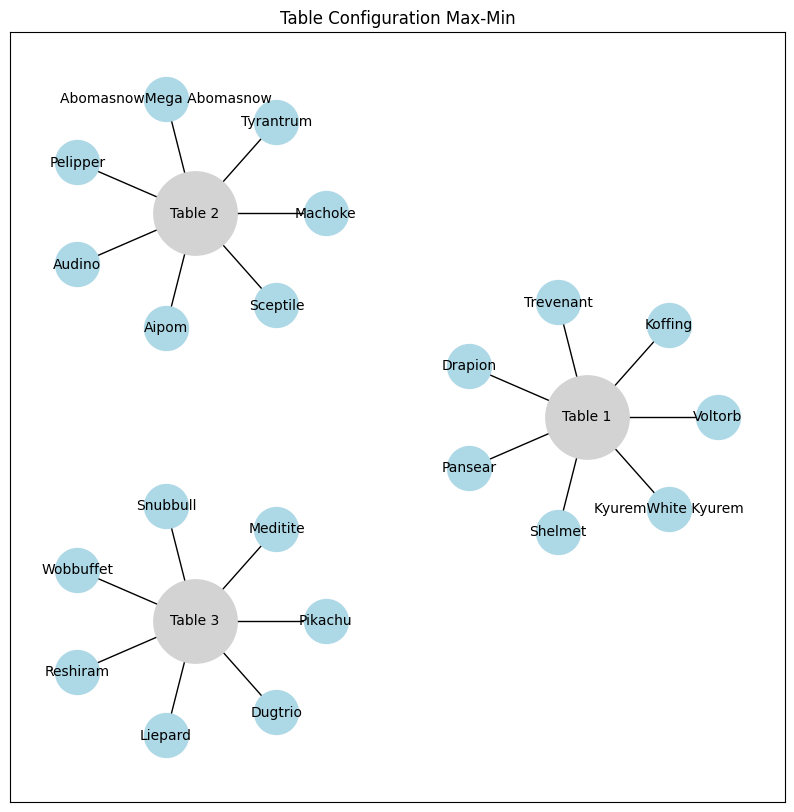

In [137]:
# Draw the graph with differentiated node sizes
plt.figure(figsize=(10, 10))

# Draw the table nodes
nx.draw_networkx_nodes(Tables_G, pos, nodelist=table_nodes, node_color='lightgrey', node_size=3600, label='Table',)

# Draw the guest nodes
nx.draw_networkx_nodes(Tables_G, pos, nodelist=guest_nodes, node_color='lightblue', node_size=1000, label='Guest')

# Draw the edges and labels
nx.draw_networkx_edges(Tables_G, pos)
nx.draw_networkx_labels(Tables_G, pos, font_size=10)
plt.title('Table Configuration Max-Min')
plt.show()